In [20]:
import math
import numpy as np
import random
import matplotlib.pyplot as plt


In [25]:
class kal_govna:
    def __init__(self, N, bl, bh):
        self.loc = self.kakashe4ka_place(N, bl, bh)
        self.p = self.loc
        self.v = self.kakashe4ka_speed(N, bl, bh)
        self.omega = 0.9
        self.fp = 0.2
        self.fg = 0.2

    def kakashe4ka_place(self, N, bh, bl):
        place = np.random.uniform(bl, bh, N)
        return place

    def kakashe4ka_speed(self, N, bl, bh):
        speed = np.random.uniform(-(bh-bl), bh-bl, N)
        return speed

    def v_calc(self, N, g):
        rp, rg = np.random.rand(N), np.random.rand(N)
        self.v = self.omega*self.v + self.fp*rp*(self.p - self.loc) + self.fg*rg*(g - self.loc)

    def loc_calc(self):
        self.loc += self.v

    def p_calc(self, func):
        if func(self.loc[0], self.loc[1]) < func(self.p[0], self.p[1]):
            self.p = self.loc

    
        

In [34]:
def draw_swarm(swarm):
    X, Y = np.meshgrid(np.linspace(-10, 10, 256), np.linspace(-10, 10, 256))
    Z = f(X,Y)
    levels = np.linspace(Z.min(), Z.max(), 12)
    x_sc = np.zeros(S)
    y_sc = np.zeros(S)
    for i in range(S):
        x_sc[i] = swarm[i].p[0]
        y_sc[i] = swarm[i].p[1]
    # plot
    fig, ax = plt.subplots(figsize=(7, 5))
    ax.contourf(X, Y, Z, levels=levels)
    ax.scatter(x_sc, y_sc, color='green')

[-1.28723291 -0.04961367]


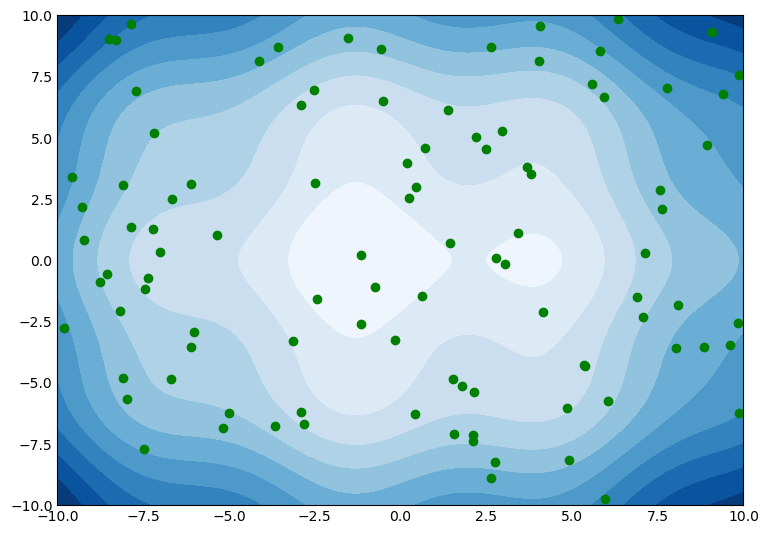

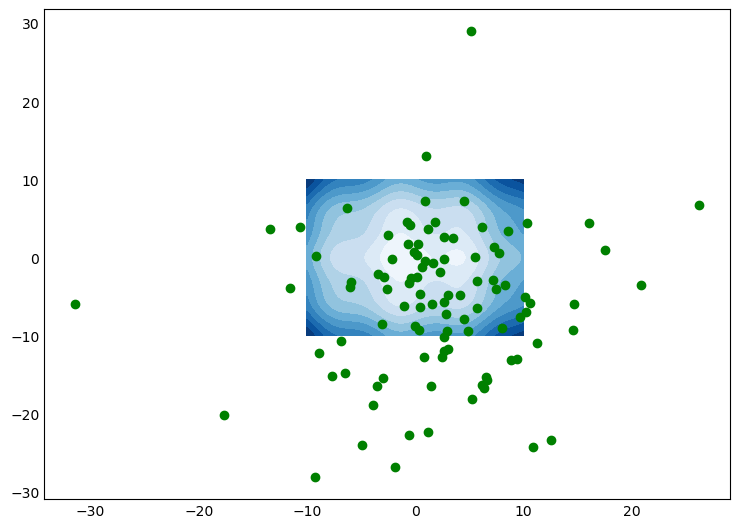

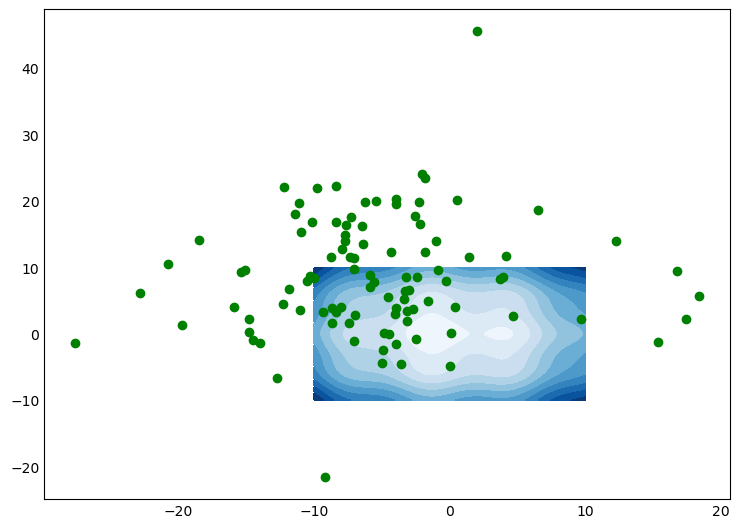

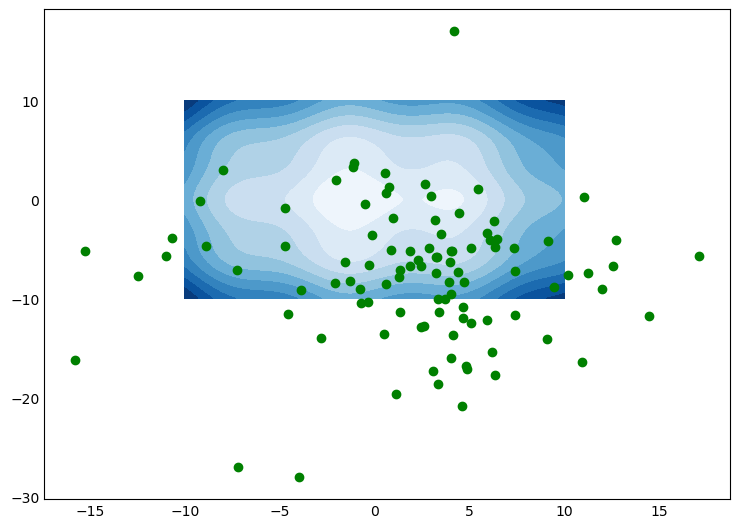

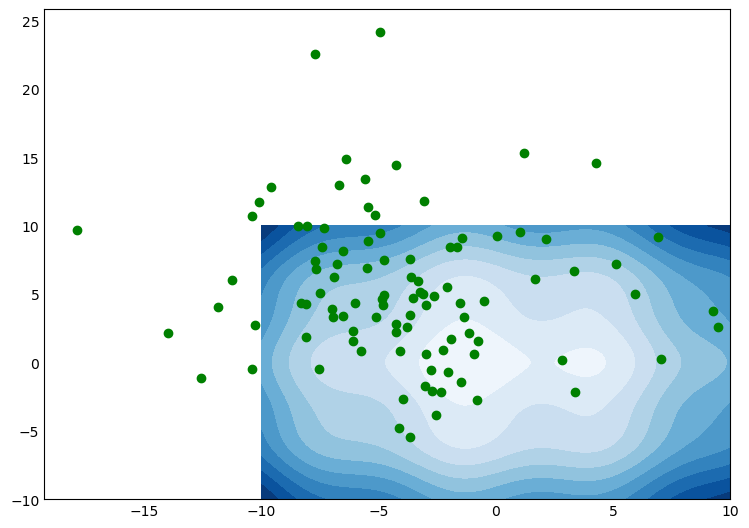

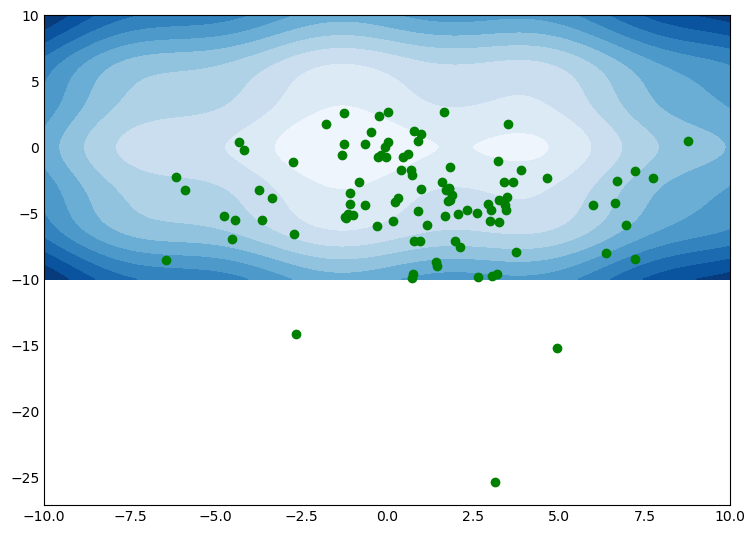

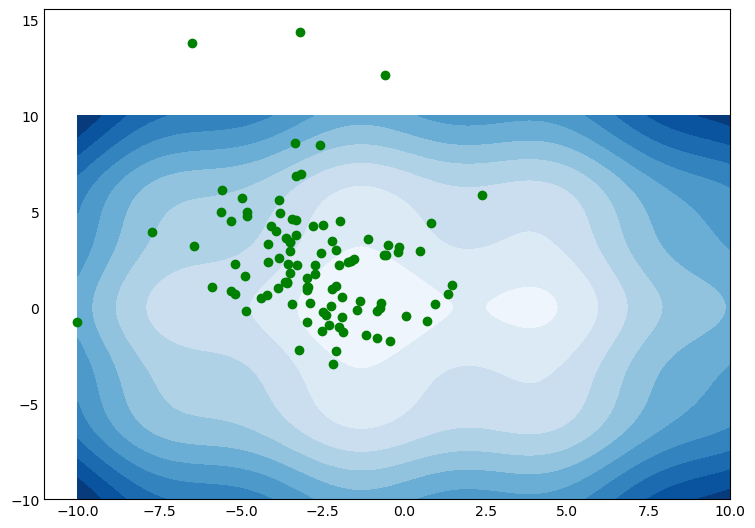

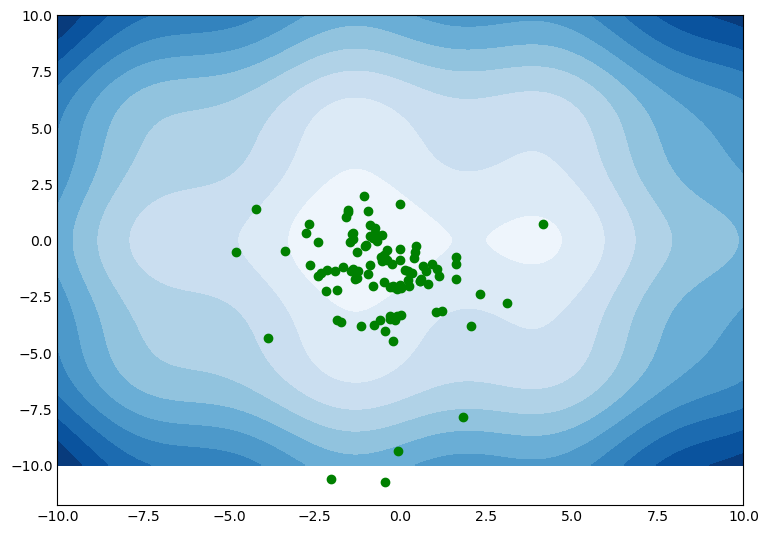

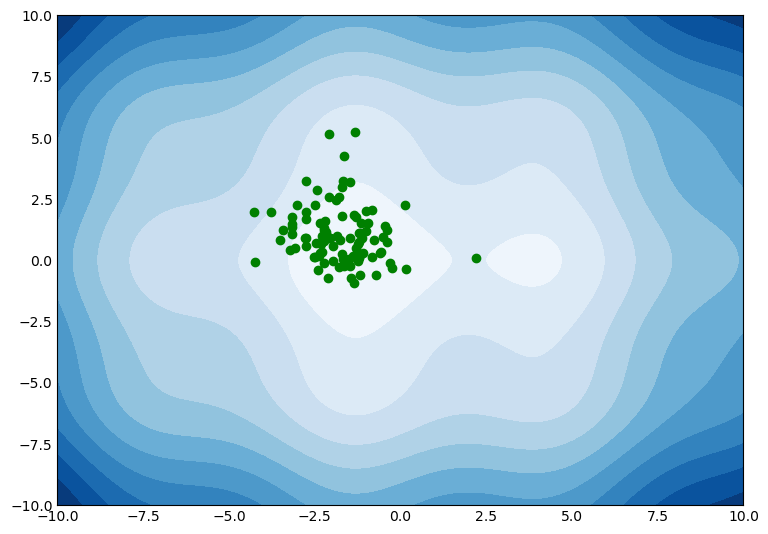

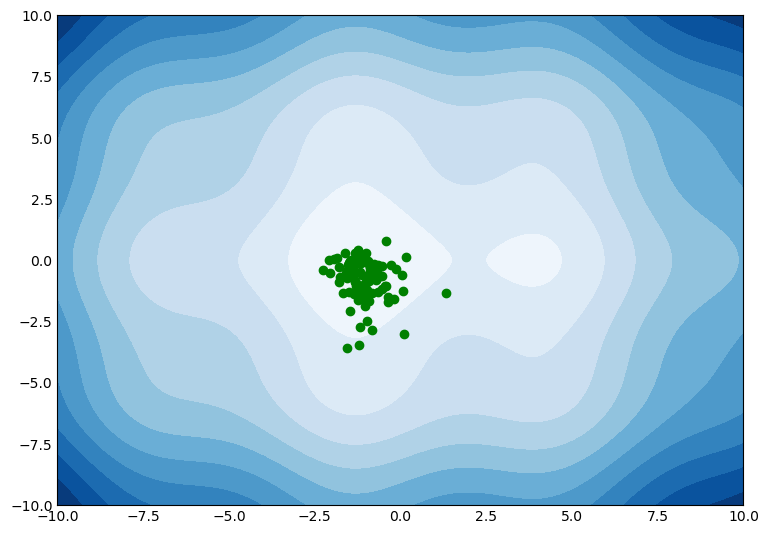

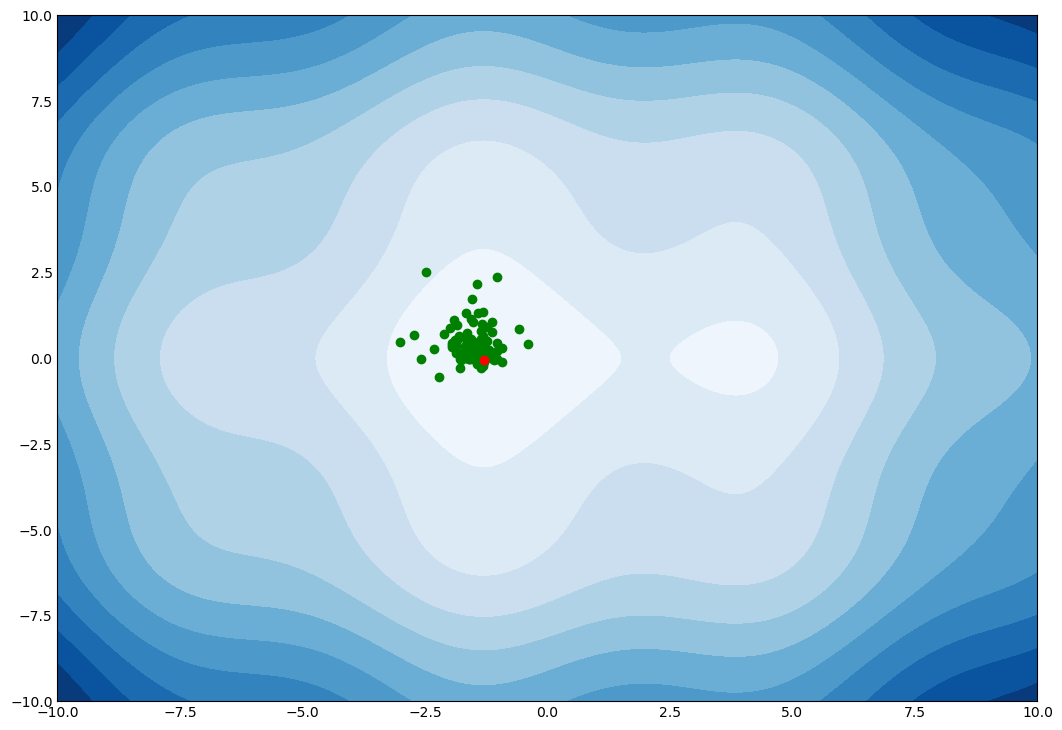

In [35]:
S = 100
N = 2
bl =-10
bh = 10
f = lambda x,y: x**2 + y**2 + 10*np.sin(x) - 5*np.cos(y)
swarm = []
g = 0
f_values = np.zeros(S)
for i in range(S):
    swarm.append(kal_govna(N, bl, bh))
for i in range(100):
    if i%10 == 0:
        draw_swarm(swarm)
    for j in range(S):
        f_values[j] = f(swarm[j].p[0], swarm[j].p[1])
    g = swarm[f_values.argmin()].p
    for j in range(S):
        swarm[j].v_calc(N, g)
        swarm[j].loc_calc()
        swarm[j].p_calc(f)
for j in range(S):
        f_values[j] = f(swarm[j].p[0], swarm[j].p[1])
g = swarm[f_values.argmin()].p

print(g)



plt.style.use('_mpl-gallery-nogrid')

# make data
X, Y = np.meshgrid(np.linspace(-10, 10, 256), np.linspace(-10, 10, 256))
Z = f(X,Y)
levels = np.linspace(Z.min(), Z.max(), 12)

x_sc = np.zeros(S)
y_sc = np.zeros(S)
for i in range(S):
    x_sc[i] = swarm[i].p[0]
    y_sc[i] = swarm[i].p[1]

# plot
fig, ax = plt.subplots(figsize=(10, 7))

ax.contourf(X, Y, Z, levels=levels)
ax.scatter(x_sc, y_sc, color='green')
ax.scatter(g[0],g[1], color='red')

plt.show()